# Towards neural networks
## \[5XSL0\] Fundamentals of Machine Learning - Assignment 2

In [1]:
# this cell imports the libraries or packages that you can use during this assignment
# you are not allowed to import additional libraries or packages
from helpers import *
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import layers, activations

> **Important**
>
> Do not import any other packages or libraries than the ones already provided to you.
>
> Write your code between the `BEGIN_TODO` and `END_TODO` markers. Do not change these markers.
>
> Always give derivations in [markdown cells](https://www.earthdatascience.org/courses/intro-to-earth-data-science/open-reproducible-science/jupyter-python/code-markdown-cells-in-jupyter-notebook/).
>
> Restart your notebook and run all cells before submission.

## Introduction
In this assignment you will extend your knowledge of the first assignment to larger and more complex models using the Python libraries Tensorflow and Keras.

Again, this assignment is split into 3 parts. In the first part you will get acquainted with these libraries and you will use them to solve the linear regression and classification problems from the first assignments. In the second part we will focus on how we should evaluate these models and on how we can identify underfitting and overfitting. Finally in the last part we will use Keras to create a handwritten digit recognizer. Although this is a group assignment, you are ought to get familiar with all parts of the assignment. Getting a thorough understanding of the material in this assignment will significantly aid your machine learning expertise.

### Learning goals
After this assignment you can
- solve machine learning problems using the Keras library;
- specify keras models;
- use Keras to optimize your model;
- increase the model complexity;
- identify under- and overfitting;
- choose an appropriate final activation function;
- split a data set in a train and test set;
- apply techniques to improve your model performance;
- use Keras to build a digit recognizer.

## Part 1: Tensorflow and Keras
In this part we will focus on the Python libraries Tensorflow and Keras. You will use both libraries for solving the machine learning problems of the first assignments.

Tensorflow is the backbone of almost all machine learning models. As the name implies (tensors are multi-dimensional matrices), the library allows us to perform fast operations using matrices. This is very important for building large models, which involve many matrix operations. Keras is a submodule of Tensorflow and acts as a front-end to Tensorflow, meaning that it allows us to write high-level code and automatically converts it to be used by Tensorflow. 

In order to get you started, we provide an example of the Keras workflow. Basically it consists out of two phases: (1) build a model, and (2) train the model. We will first create a model. For this purpose we will take the simple linear model of the first assignment, specified by $y=\theta  x$. Our model consists out of a single operation, specified by a single _layer_. We can represent consecutive operations by adding so-called _layers_ in our model. These layers can be simply tied together in Keras using the following syntax:
```
<output_of_layer> = layers.<layer_name>(<layer_options>)(<input_to_layer>)
```
In the simple linear model, we have an input layer and 1 other layer: the linear transformation/matrix multiplication (called the `Dense` layer in Keras, because a matrix multiplication can be regarded as a fully connected computational graph). First we will specify our input layer as ```inputs = layers.Input(shape=(1,))```. The specified shape corresponds to the shape of the individual input elements. In this case we will be dealing with scalar values, whose shape is specified as `(1,)`. Next up we will connect a `Dense` layer to the output of the input layer as ```outputs = layers.Dense(1, use_bias=False)(inputs)```. Finally we will create the model by specifying the input and outputs of the model as ```model = keras.Model(inputs, outputs)```. If we have specified our model, we can print a summary of the model by calling the `model.summary()` method.


In [3]:
# Build a linear model and plot its summary

inputs = layers.Input(shape=(1, ))
outputs = layers.Dense(1, use_bias=False)(inputs)
model = keras.Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


Have a good look at the code above on how the model is specified, because this will be important in this assignment. Here we have removed the bias term to follow the first assignment as closely as possible. In the `Dense` layer we specify the dimension of the output of the layer, which we set to 1 as our output is also scalar. As we can see in the model summary we only have 1 parameter. The printed output shape might look a bit weird at first, because the first dimension is not specified. This is because the first dimension specifies the number of data points that we feed into the network.

Next we will need to compile our model:

In [3]:
# compile model
model.compile(optimizer="adam", loss="mean_squared_error")

Here we have specified the optimizer to be the Adam optimizer. This optimizer is similar to the gradient descent optimizer, but makes use of some smart techniques to speed up the convergence of the optimization problem. Details of this optimizer are beyond the scope of this course, but we recommend you to use this optimizer throughout the rest of the assignment. Furthermore we specify the loss function that we would like to minimize, which has been chosen as the mean squared error (MSE).

Next up is training the model. We will generate some data and call the `model.fit()` method to train the model on this data.

In [9]:
# load data
X, y = ex211_generate_data()

# fit or train the model
history = model.fit(X, y, epochs=1000, verbose=0, callbacks=[customProgressBar()])

epoch 1000/1000


We supply the train function with the input data, expected output data, the number of iterations over the entire data set (_epochs_) and we specify some custom settings for printing the progress in order to prevent huge outputs from being printed. Once the training has finished, the optimized parameters are saved in the `model` object and the model returns the `history` object, which contains the losses over time.

In order to plot the output of the model, we will call the model using the `model.predict()` method on some custom input data. Below we make the predictions, plot the original data and our model and we plot the loss over time.

32/32 [==============================] - 0s 386us/step


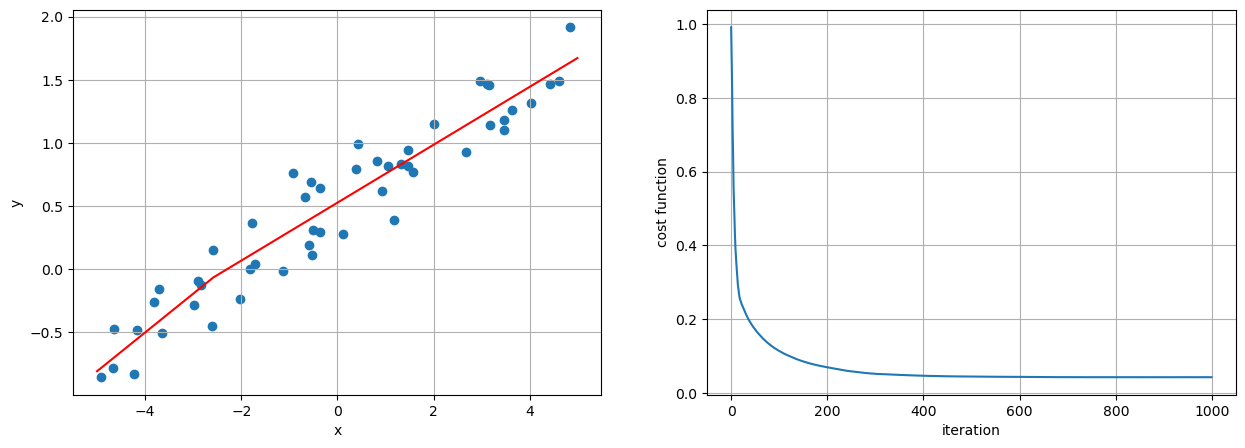

In [10]:
# make predictions
X_pred = np.arange(-5, 5, 0.01)
y_pred = model.predict(X_pred);

# plot data
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].scatter(X,y)
ax[0].plot(X_pred, y_pred, color="red")
ax[1].plot(history.history['loss'])
ax[0].grid(), ax[1].grid(), ax[0].set_xlabel("x"), ax[0].set_ylabel("y"), ax[1].set_xlabel("iteration"), ax[1].set_ylabel("cost function");

---
---
### Exercise 1.1: Linear model with bias in Keras (1 point) 
In the above example the model only has one parameter and does not have a bias term to deal with the offset in the data. Recreate the model in the example, but now include the bias term, such that our new model can be specified as $y=\theta x + b$. Train this model on the data obtained by `X, y = ex211_generate_data()` until the algorithm has converged. Plot the output of the model for $-5\leq x \leq 5$ together with the generated data. Also plot the loss over time.

In [6]:
#// BEGIN_TODO [5XSL0_Assignment2_1_1a] Create and train linear model with bias

inputs = layers.Input(shape=(1, ))
outputs = layers.Dense(1, use_bias=True)(inputs)
model = keras.Model(inputs, outputs)
model.summary()

model.compile(optimizer="adam", loss="mean_squared_error")

#// END_TODO [5XSL0_Assignment2_1_1a]

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


epoch 1000/1000
32/32 [==============================] - 0s 314us/step


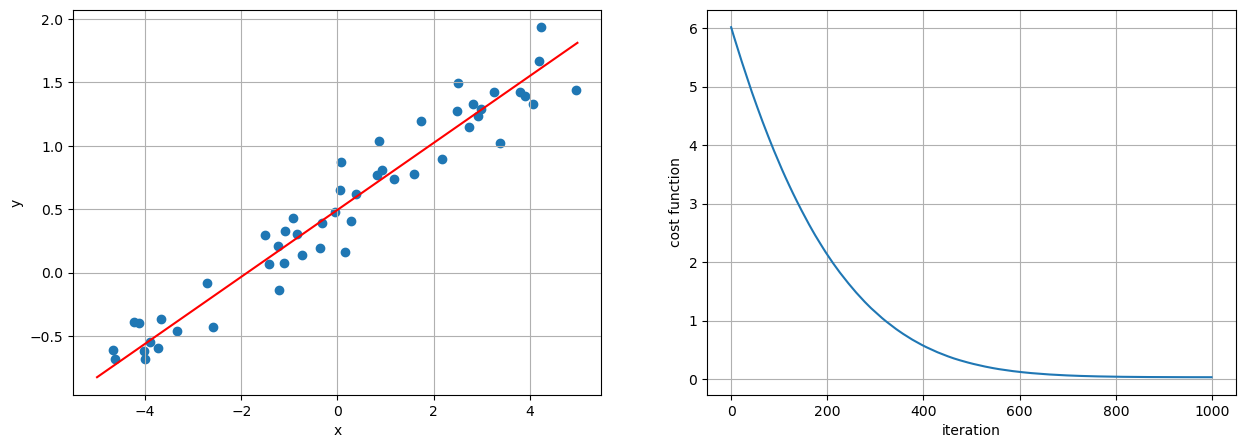

In [7]:
#// BEGIN_TODO [5XSL0_Assignment2_1_1b] Plot results of linear model with bias

X, y = ex211_generate_data()

history = model.fit(X, y, epochs=1000, verbose=0, callbacks=[customProgressBar()])

X_pred = np.arange(-5, 5, 0.01)
y_pred = model.predict(X_pred);

# plot data
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].scatter(X,y)
ax[0].plot(X_pred, y_pred, color="red")
ax[1].plot(history.history['loss'])
ax[0].grid(), ax[1].grid(), ax[0].set_xlabel("x"), ax[0].set_ylabel("y"), ax[1].set_xlabel("iteration"), ax[1].set_ylabel("cost function");

#// END_TODO [5XSL0_Assignment2_1_1b]

### End of exercise 1.1
---
---

---
---
### Exercise 1.2: Limitations of the linear model (1 point)
In the previous example the data seems to obey some linear relationship. However, in practice not all data behaves linearly as you have also seen in the first assignment. Recreate the model of the previous exercise and run it on a new data set that has been generated using `X, y = ex212_generate_data()`. Plot the output of the model for $-5\leq x \leq 5$ together with the generated data. Also plot the loss over time. Elaborate on why the current model is insufficient for the current data. Use _model complexity_ in your answer.


In [8]:
#// BEGIN_TODO [5XSL0_Assignment2_1_2a] Create and train simple model

inputs = layers.Input(shape=(1, ))
outputs = layers.Dense(1, use_bias=True)(inputs)
model = keras.Model(inputs, outputs)
model.summary()

model.compile(optimizer="adam", loss="mean_squared_error")

#// END_TODO [5XSL0_Assignment2_1_2a]

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


epoch 1000/1000
32/32 [==============================] - 0s 314us/step


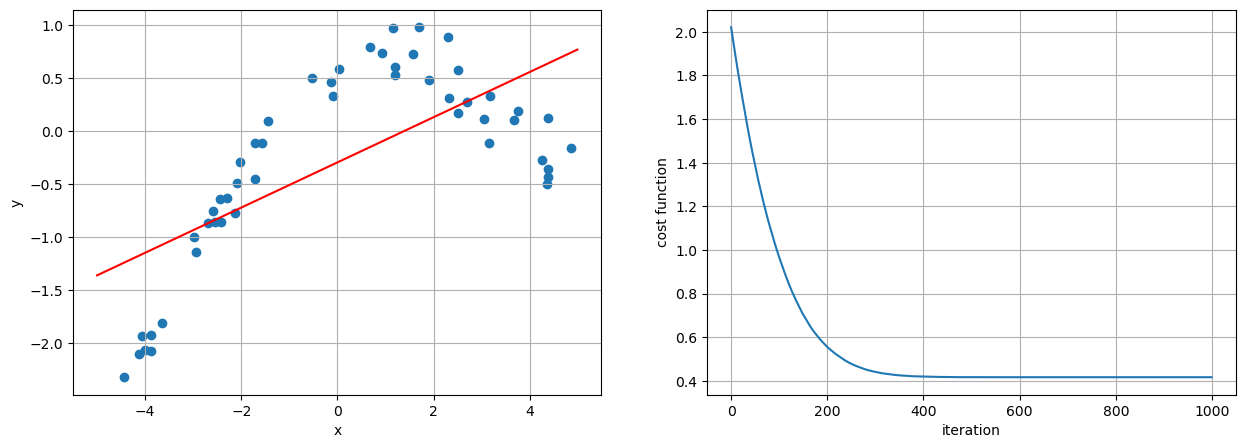

In [9]:
#// BEGIN_TODO [5XSL0_Assignment2_1_2b] Plot results of simple model

X, y = ex212_generate_data()

history = model.fit(X, y, epochs=1000, verbose=0, callbacks=[customProgressBar()])

X_pred = np.arange(-5, 5, 0.01)
y_pred = model.predict(X_pred);

# plot data
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].scatter(X,y)
ax[0].plot(X_pred, y_pred, color="red")
ax[1].plot(history.history['loss'])
ax[0].grid(), ax[1].grid(), ax[0].set_xlabel("x"), ax[0].set_ylabel("y"), ax[1].set_xlabel("iteration"), ax[1].set_ylabel("cost function");

#// END_TODO [5XSL0_Assignment2_1_2b]

`#// BEGIN_TODO [5XSL0_Assignment2_1_2c] Explanation`

The linear regression cannot predict non-linear prediction. The linear regression cannot capture the complex patterns and relationship in the non-linear dataset. We need to add polynomial feature to increase the model complexity.

`#// END_TODO [5XSL0_Assignment2_1_2c]`

### End of exercise 1.2
---
---

---
---
### Exercise 1.3: Towards more complex models (3 points)
For the new data set we would like to make our current model more complex to obtain a better fit on the data. Consider the situation where we would append another `Dense` layer with bias term to the current output of our model. Would this increase the model complexity? Back up your answer mathematically by describing the new input-output relationship.

`#// BEGIN_TODO [5XSL0_Assignment2_1_3] Appending linear layers`

Adding a new dense layer with a bias term to the current output of a model will increase the model's complexity. This is because the new layer will introduce additional parameters that the model needs to learn.

$$ y = ReLu(A_1 x + b_1)$$
the $A_1$ dimension is m $\times$ n and $b_1$ is m $\times$ 1, then the dimension of $y$ is m $\times$ (n+1). the output dimension is increased and complexity also increased.

`#// END_TODO [5XSL0_Assignment2_1_3]`

### End of exercise 1.3
---
---

In order to break the linear relationships, we are going to add non-linear transformations inbetween the linear transformations. These non-linear operations are appended after the individual linear layers and are also called _activation functions_. We have to be careful if we also append a non-linear operation to the output of the model, because each non-linear transformation maps an input to a new (and potentially bounded) domain. This could potentially prevent our model from being able to model the entire domain of the expected output data. Depending on the output data we might also choose not to use an activation layer at the output of our system.

Below we present two very common non-linear activation functions. The Rectified Linear Unit (ReLU) takes the input and maps all negative inputs to zeros, creating a piecewise mapping of the input signal. The output of the Sigmoid function is bounded between -1 and 1 and squeezes the input signal to this domain, making it very suitable for binary classifications tasks.

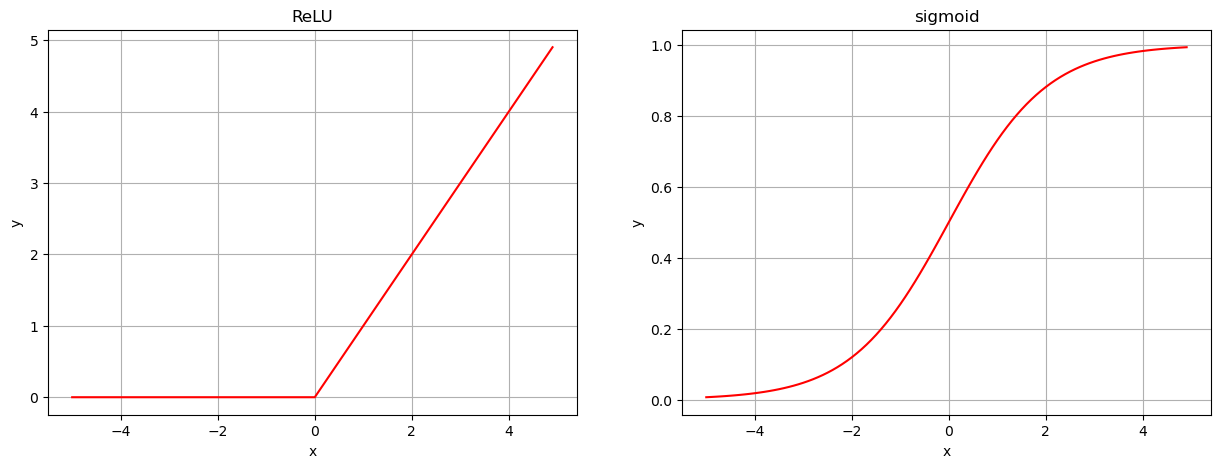

In [10]:
def relu(x): return max(0,x)
def sigmoid(x): return 1 / (1 + np.exp(-x))

_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].plot(np.arange(-5,5,0.1), np.array(list(map(relu, np.arange(-5,5,0.1)))), color="red")
ax[1].plot(np.arange(-5,5,0.1), np.array(list(map(sigmoid, np.arange(-5,5,0.1)))), color="red")
ax[0].grid(), ax[1].grid(), ax[0].set_xlabel("x"), ax[0].set_ylabel("y"), ax[1].set_xlabel("x"), ax[1].set_ylabel("y"), ax[0].set_title("ReLU"), ax[1].set_title("sigmoid");

---
---
### Exercise 1.4: Building non-linear models (3 points)
In this exercise we will break the linearity in the previous model. Add a ReLU layer inbetween the Dense layers. Have a look at the `activation=` argument of the `Dense` layers in the Keras documentation. Again use the `X, y = ex212_generate_data()` function to generate the data and run your model until it has converged. Plot the output of the model for $-5\leq x \leq 5$ together with the generated data and also plot the loss over time. Finally, explain whether this model needs a ReLU activation function in the final layer for the current dataset.

In [3]:
#// BEGIN_TODO [5XSL0_Assignment2_1_4a] Create and train simple non-linear model

inputs = layers.Input(shape=(1, ))
medium = layers.Dense(4, use_bias=True)(inputs)
activation = keras.activations.relu(medium)
outputs = layers.Dense(1, use_bias=True)(activation)
model = keras.Model(inputs, outputs)
model.summary()

model.compile(optimizer="adam", loss="mean_squared_error")

#// END_TODO [5XSL0_Assignment2_1_4a]

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 4)                 8         
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


epoch 1000/1000
32/32 [==============================] - 0s 375us/step


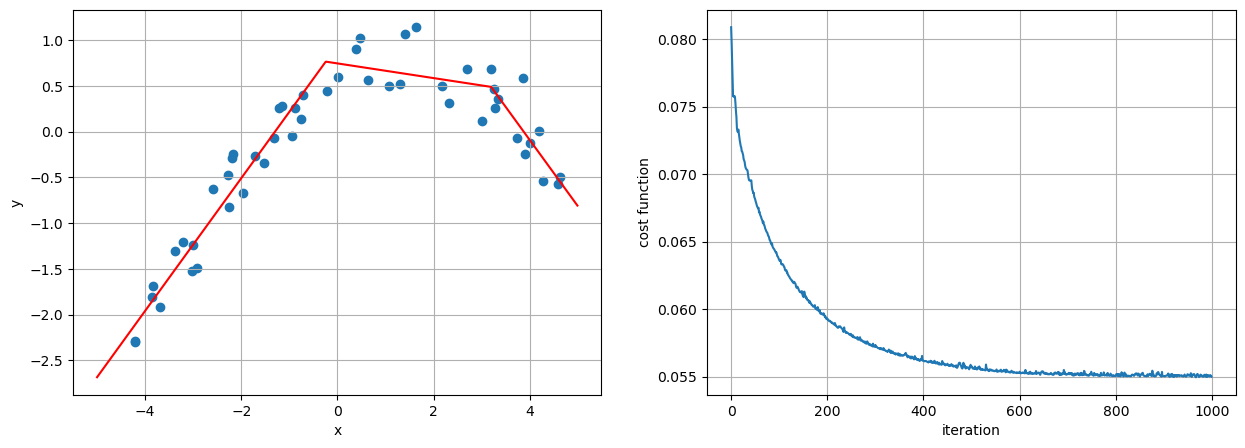

In [8]:
#// BEGIN_TODO [5XSL0_Assignment2_1_4b] Plot output

X, y = ex212_generate_data()

history = model.fit(X, y, epochs=1000, verbose=0, callbacks=[customProgressBar()])

X_pred = np.arange(-5, 5, 0.01)
y_pred = model.predict(X_pred);

# plot data
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].scatter(X,y)
ax[0].plot(X_pred, y_pred, color="red")
ax[1].plot(history.history['loss'])
ax[0].grid(), ax[1].grid(), ax[0].set_xlabel("x"), ax[0].set_ylabel("y"), ax[1].set_xlabel("iteration"), ax[1].set_ylabel("cost function");

#// END_TODO [5XSL0_Assignment2_1_4b]

`#// BEGIN_TODO [5XSL0_Assignment2_1_4c] relu activation function at output`

It is unnecessary to add ReLu at the last layer. If we add the Relu at the last layer, the non-linear regression will be fail. Because the output is the prediction of Y value at each point. If we add Relu at last layer, the points that Y-axis smaller than 0 will not able to regression and the output will be 0.

`#// END_TODO [5XSL0_Assignment2_1_4c]`

### End of exercise 1.4
---
---

---
---
### Exercise 1.5: Optimization and convergence (2 points)
Train the model of exercise 1.4 a couple of times from scratch and elaborate on the results of the trained models. Does the optimization always converge to the same loss and predictions and why is that the case?

`#// BEGIN_TODO [5XSL0_Assignment2_1_5] Convergence explanation`

No.
1, When training a model, the parameters are typically initialized with random values. Depending on the initialization, the optimization algorithm may converge to a different point in the parameter space.
2, The number of iteration will affect the final solution. If the number of iteration is very low, the optimization may not converge to the optimal solution.

`#// END_TODO [5XSL0_Assignment2_1_5]`

### End of exercise 1.5
---
---

## Part 2: Generalization
In assignment 1 we added hand-crafted features to our data to increase the complexity of our model. In this assignment we will let the model do this by itself by adding a so-called feature space. Consider the following model:
$$ x_1 = max(0, A_1 x + b_1)$$
$$ y = A_2 x_1 + b_2$$
where $x$ represents the scalar input and $y$ the expected scalar output. In this model the matrices and bias terms are also scalar. $x_1$ is calculated by the model itself through the optimization of the parameters. This term $x_1$ is then mapped to the output. The physical interpretation of $x_1$ is unknown, but we know that it is extracted from the input $x$ and can be converted to the output $y$. The term $x_1$ tells us something about our input signal and can therefore be regarded as a _feature_ or _feature space_.

In the current model the feature space is of dimension 1. However we can resize the matrices $A_1$ and $A_2$ and bias term $b_1$ such that $x_1$ has a larger dimensionality. 

---
---
### Exercise 2.1: Increasing the complexity of a model (2 points)
In this exercise we will continue with the model of exercise 1.4, but we will increase the size of the output of the first `Dense` layer. Recreate the model from exercise 1.4 and adjust the output size of the first `Dense` layer such that intermediate variable is a vector of length 100, meaning that the 1 dimensional input is transformed to a vector of length 100. You can use the `model.summary()` command to gain insight in what is happening in the model and what the intermediate output sizes are. Train this model on the data set generated by `X, y = ex212_generate_data()` until convergence. Plot the output of the model for $-5\leq x \leq 5$ together with the generated data. Also plot the loss over time. Furthermore run the `model.summary()` command and specify the dimensions and how many parameters are used in each of the above terms $A_1$, $A_2$, $b_1$ and $b_2$.

In [3]:
#// BEGIN_TODO [5XSL0_Assignment2_2_1a] Create and train complex model

inputs = layers.Input(shape=(1, ))
medium = layers.Dense(100, use_bias=True, activation='relu')(inputs)
outputs = layers.Dense(1, use_bias=True)(medium)
model21 = keras.Model(inputs, outputs)

model21.compile(optimizer="adam", loss="mean_squared_error")

#// END_TODO [5XSL0_Assignment2_2_1a]

epoch 1000/1000
32/32 [==============================] - 0s 352us/step


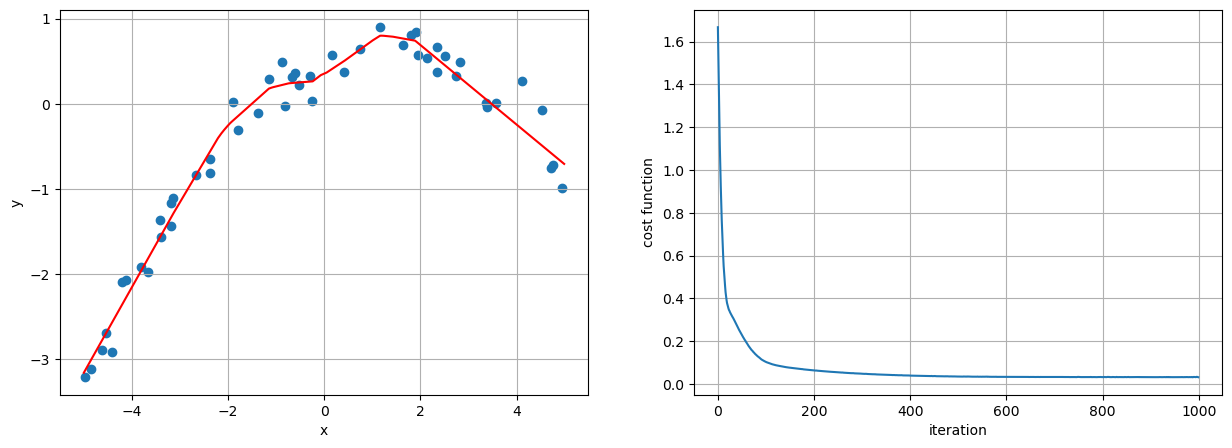

In [4]:
#// BEGIN_TODO [5XSL0_Assignment2_2_1b] Plot output

X, y = ex212_generate_data()

history = model21.fit(X, y, epochs=1000, verbose=0, callbacks=[customProgressBar()])

X_pred = np.arange(-5, 5, 0.01)
y_pred = model21.predict(X_pred);

# plot data
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].scatter(X,y)
ax[0].plot(X_pred, y_pred, color="red")
ax[1].plot(history.history['loss'])
ax[0].grid(), ax[1].grid(), ax[0].set_xlabel("x"), ax[0].set_ylabel("y"), ax[1].set_xlabel("iteration"), ax[1].set_ylabel("cost function");

#// END_TODO [5XSL0_Assignment2_2_1b]

In [6]:
#// BEGIN_TODO [5XSL0_Assignment2_2_1c] Print model summary

model21.summary()

#// END_TODO [5XSL0_Assignment2_2_1c]

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


`#// BEGIN_TODO [5XSL0_Assignment2_2_1d] Matrix dimensions`

Matrix Dimension:

parameters:
 $A_1$: 100 $\times$ 1
 $A_2$: 100 $\times$ 1
 $b_1$: 100 $\times$ 1
 $b_2$: 1 $\times$ 1

`#// END_TODO [5XSL0_Assignment2_2_1d]`

### End of exercise 2.1
---
---

---
---
### Exercise 2.2: More layers and dimensions! (3 points)
Add more fully connected layers with biases and ReLU activation functions, such that we have a total of 5 `Dense` layers. These layers may include an activation function if appropriate. __All__ intermediate outputs should be vectors of length 100. Train this model again on the data set generated by `X, y = ex212_generate_data()` until convergence. Plot the output of the model for $-5\leq x \leq 5$ together with the generated data. Also plot the loss over time and elaborate on the final value of the loss function. Furthermore run the `model.summary()` command and explain the consequences of the ratio between the number of data points and the number of parameters?

In [7]:
#// BEGIN_TODO [5XSL0_Assignment2_2_2a] Create and train more complex model

inputs = layers.Input(shape=(1, ))
medium1 = layers.Dense(100, use_bias=True, activation='relu')(inputs)
medium2 = layers.Dense(100, use_bias=True, activation='relu')(medium1)
medium3 = layers.Dense(100, use_bias=True, activation='relu')(medium2)
medium4 = layers.Dense(100, use_bias=True, activation='relu')(medium3)
medium5 = layers.Dense(100, use_bias=True, activation='relu')(medium4)
outputs = layers.Dense(1, use_bias=True)(medium5)
model22 = keras.Model(inputs, outputs)

model22.compile(optimizer="adam", loss="mean_squared_error")

#// END_TODO [5XSL0_Assignment2_2_2a]

epoch 1000/1000
32/32 [==============================] - 0s 387us/step


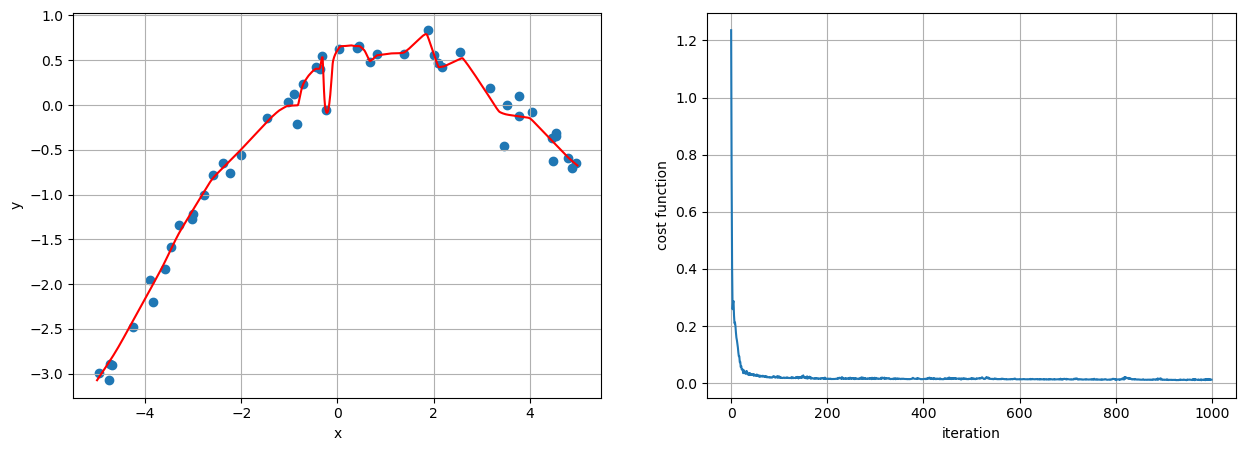

In [8]:
#// BEGIN_TODO [5XSL0_Assignment2_2_2b] Plot output more complex model

X, y = ex212_generate_data()

history = model22.fit(X, y, epochs=1000, verbose=0, callbacks=[customProgressBar()])

X_pred = np.arange(-5, 5, 0.01)
y_pred = model22.predict(X_pred);

# plot data
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].scatter(X,y)
ax[0].plot(X_pred, y_pred, color="red")
ax[1].plot(history.history['loss'])
ax[0].grid(), ax[1].grid(), ax[0].set_xlabel("x"), ax[0].set_ylabel("y"), ax[1].set_xlabel("iteration"), ax[1].set_ylabel("cost function");

#// END_TODO [5XSL0_Assignment2_2_2b]

In [9]:
#// BEGIN_TODO [5XSL0_Assignment2_2_2c] Print model summary

model22.summary()

#// END_TODO [5XSL0_Assignment2_2_2c]

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_2 (Dense)             (None, 100)               200       
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101 

`#// BEGIN_TODO [5XSL0_Assignment2_2_2d] Explanation`

If the ratio between the number of data points and the number of parameters is high, the model are possibly get overfitting. The model will try to  converge all the points and cannot ignore the noise. The model will have a low test dataset accuracy.

If the ratio between the number of data points and the number of parameters is low, the model are possibly get underfitting. Model may not able to generate well to unseen data.


`#// END_TODO [5XSL0_Assignment2_2_2d]`

### End of exercise 2.2
---
---

As you have seen in the previous exercise, the number of parameters quickly grows and the output of our network shows some undesired jittery behaviour. To combat this overfitting, we will create a test set: a data set which contains data that our model has never seen before. Instead of having a look at the loss on the training data, we will keep a close eye on the test loss, which tells us how good our model is in generalizing towards unforseen data.

---
---
### Exercise 2.3: Training and testing (5 points)
Split the data set obtained by `X, y = ex212_generate_data()` in a training set and test set. Make sure that the training set contains the first 60% of the data samples and the test set the last 40%. Run the models of exercise 2.1 and 2.2 on the training data set for 2000 epochs and use the test data set to calculate the test loss for each epoch. Plot the data sets with distinct colors and in the same plot, plot the output of both models for $-5\leq x \leq 5$. Furthermore create two plots, one for each model, where you plot the cost function for the training set and the cost function for the test set. Use legends and titles to make your plots easy to understand. Which model performs better?


In [22]:
#// BEGIN_TODO [5XSL0_Assignment2_2_3a] Create and train complex model on train set

model21.compile(optimizer="adam", loss="mean_squared_error")
model22.compile(optimizer="adam", loss="mean_squared_error")

X, y = ex212_generate_data()
train_size = int(0.6 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

history21 = model21.fit(X_train, y_train, epochs=1000, verbose=0, callbacks=[customProgressBar()], validation_data=(X_test, y_test))
history22 = model21.fit(X_train, y_train, epochs=1000, verbose=0, callbacks=[customProgressBar()], validation_data=(X_test, y_test))

#// END_TODO [5XSL0_Assignment2_2_3a]

epoch 1000/1000


32/32 [==============================] - 0s 444us/step


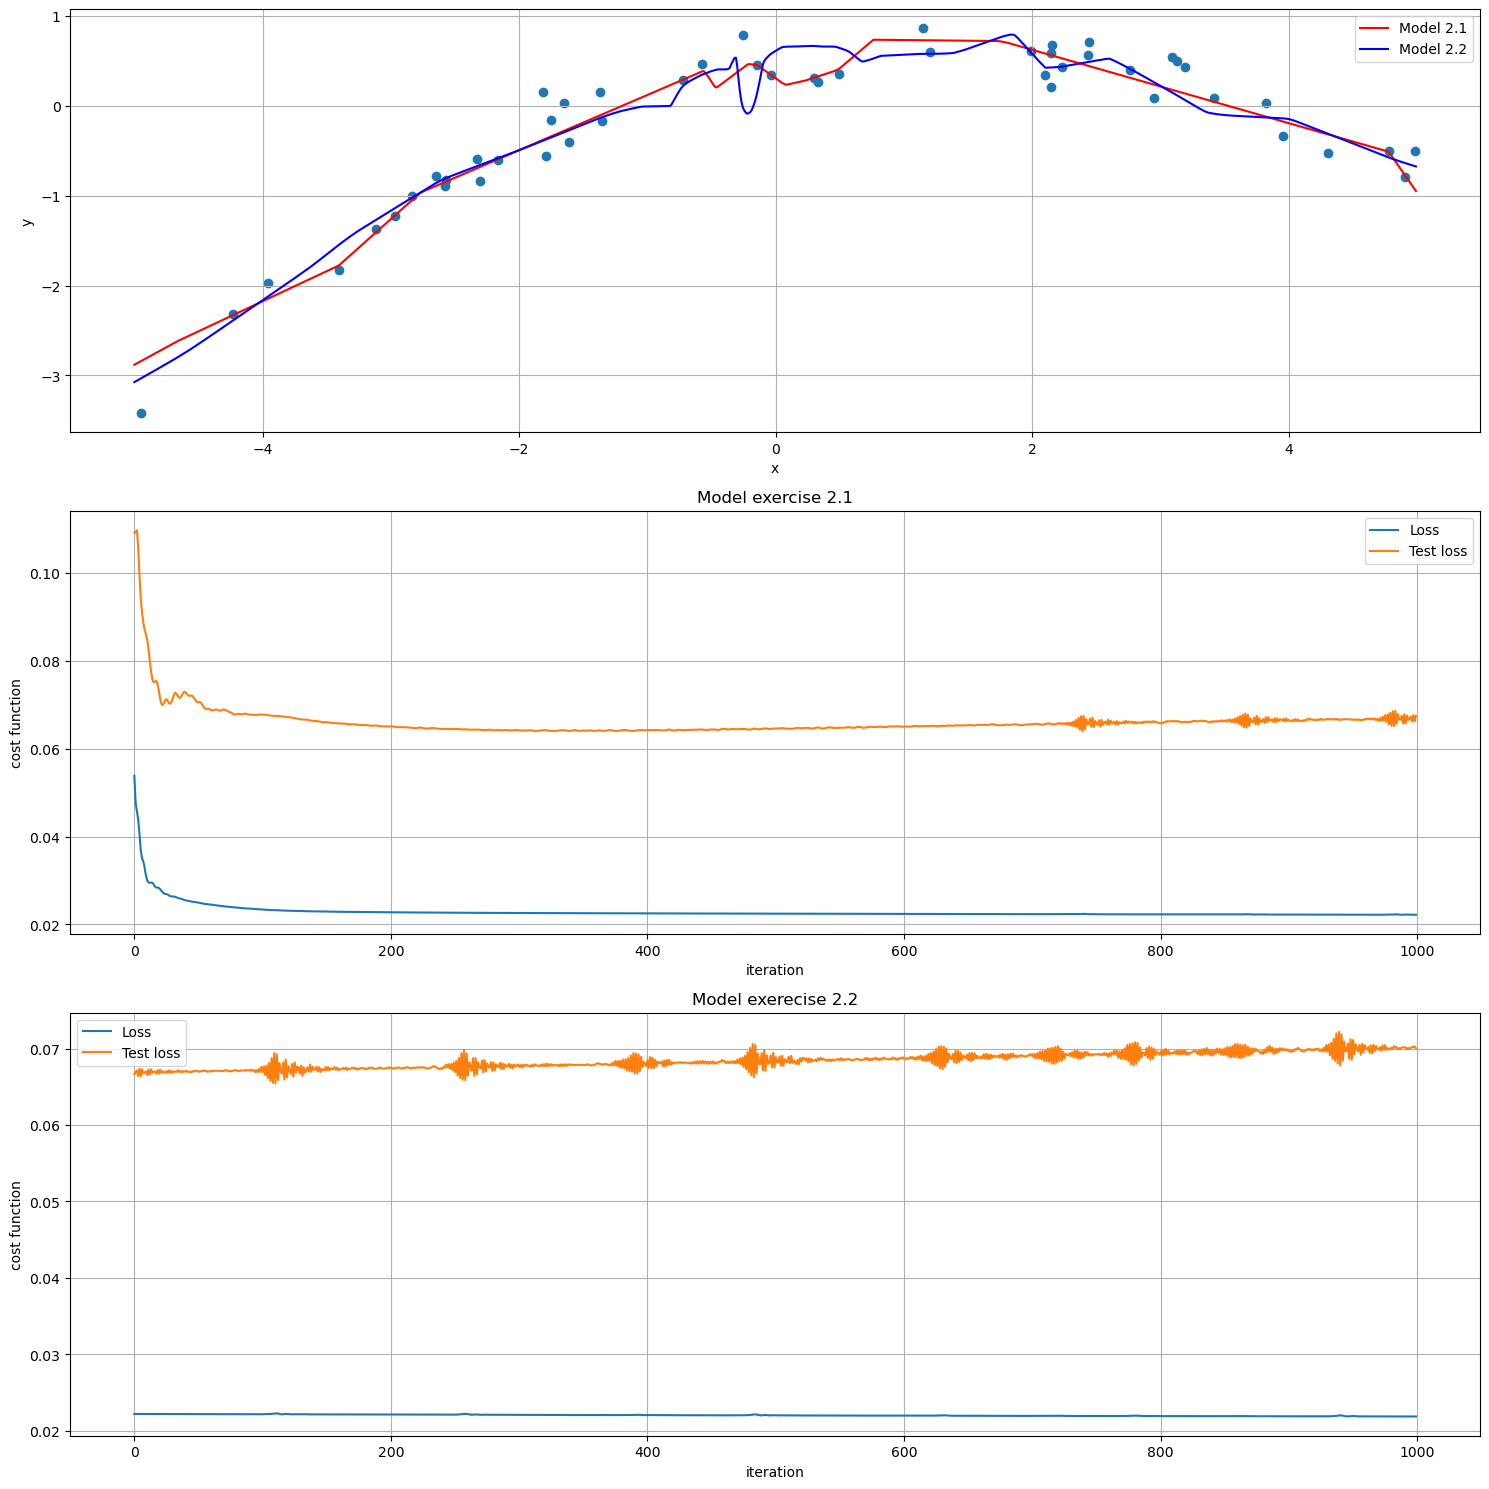

In [23]:
#// BEGIN_TODO [5XSL0_Assignment2_2_3b] Plot train and test results

X_pred = np.arange(-5, 5, 0.01)
y_pred1 = model21.predict(X_pred);
y_pred2 = model22.predict(X_pred);

_, ax = plt.subplots(3, figsize=(15,15))
ax[0].scatter(X,y)
ax[0].plot(X_pred, y_pred1, color="red", label="Model 2.1")
ax[0].plot(X_pred, y_pred2, color="blue", label="Model 2.2")
ax[1].plot(history21.history['loss'], label="Loss")
ax[1].plot(history21.history['val_loss'], label="Test loss")
ax[2].plot(history22.history['loss'], label="Loss")
ax[2].plot(history22.history['val_loss'], label="Test loss")
ax[0].grid(), ax[1].grid(), ax[2].grid(), ax[0].set_xlabel("x"), ax[0].set_ylabel("y"), ax[1].set_xlabel("iteration"), ax[1].set_ylabel("cost function"), ax[2].set_xlabel("iteration"), ax[2].set_ylabel("cost function"), ax[1].set_title("Model exercise 2.1"), ax[2].set_title("Model exerecise 2.2");
ax[0].legend(), ax[1].legend(), ax[2].legend()
_.tight_layout()

# // END_TODO [5XSL0_Assignment2_2_3b]

`#// BEGIN_TODO [5XSL0_Assignment2_2_3c] Which model is better`

Looking at the cost functions we see that both models end up in about the same spot despite both having a different shape. Model 2.2 is slighty higher so theoretically it could be called better but looking at the models themselves you see that model 2.1 has a more "smooth" shape whereas model 2.2 has some characteristics of overfitting. So from that it is hard to call one of them the "better" model.

`#// END_TODO [5XSL0_Assignment2_2_3c]`

### End of exercise 2.3
---
---

## Part 3: Real-world example
The examples that we covered above were relatively easy examples, meaning that we could still visualize the data and that we could judge by ourselves whether the output that we received was actually correct. In this part of the assignment you will create a (deep) neural network for the classification of the handwritten digits.

We will make use of a part of the MNIST dataset. This dataset contains images of handwritten digits. Example images of the MNIST data set are given by:

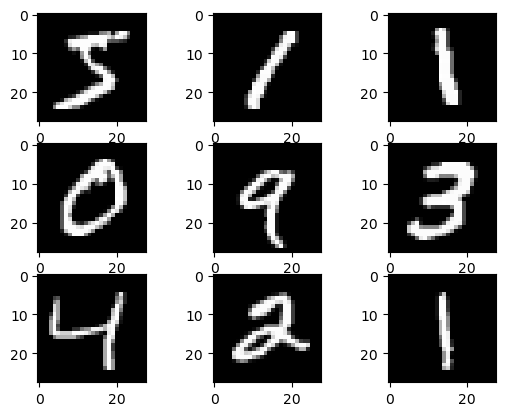

In [21]:
X, y = ex23_load_MNIST(); ex23_plot_MNIST_impression(X);

In this part you are given the freedom to create your own handwritten digit classifier. There are several requirements that you have to fulfill:
- Randomly split the train and test set in parts of 70% and 30%, respectively.
- The images should be fed in directly as an input.
- The model has a maximum of 15 layers (including activation functions).
- The model has a maximum of 20000 parameters.
- The final test accuracy should be higher than 95%.

To get you started we also generously provide some tips:
- Training on the entire data set with all data at once is very time consuming. However, you can also train with batches of data, meaning that you feed in a portion of the data at a time and not all the data at once. Have a look at the documentation of the `model.fit()` method to see how to implement this. The corresponding optimization algorithm is known as Stochastic gradient descent, because we do not know which batches are fed into the network and when. Every time a batch is processed, the parameters are also updated. Therefore we no longer need the large number of epochs (full iterations over the train set). To see your progress during these batches, remove the custom callbacks argument in the `model.fit()` method and the verbosity setting. (see https://keras.io/api/models/model_training_apis/#fit-method)
- The Rectified Linear Unit (ReLU) potentially prevents preceding layers to learn their parameters properly, because the derivative of the ReLU is 0 for negative inputs. Therefore the parameters that are updated using this derivate might not be updated very well. To prevent this, you can adjust the slope for negative values using the `alpha` argument in the ReLu function. (see https://keras.io/api/layers/activations/#relu-function)
- The mean squared error cost function that we minimized before might not be too useful here. You should switch to `"categorical_crossentropy"`, which minimizes a similarity measure between the different classes, specified by categorical random variables, which are specified by random vectors. (see https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class)
- The current output contains integers that are not directly useful for the network and our cost function. The labels of the dataset should first be converted to a so-called one-hot encoded vector, where each class integer is converted to a vector of zeros with a single 1 at the position specified by the integer denoting the class. You can also view this vector as a probability vector where each of the elements specifies the probability of a class. (see https://keras.io/api/utils/python_utils/#to_categorical-function)
- In addition to the above two points, the output of the network should also be changed to comply with the vector format specified by the previous point. A softmax layer can be used to create a vector of the same size, where all elements sum to 1, just like a probability vector. (see https://keras.io/api/layers/activation_layers/softmax/)
- Add categorical accuracy as an additional metric in the `model.fit()` method to gain more intuition on the performance of the model. (see https://keras.io/api/metrics/accuracy_metrics/#categoricalaccuracy-class)
- To reduce the dimensionality of your images in your network you can use so-called `Pooling` layers. These average or take the maximum over a patch of the input image. (see https://keras.io/api/layers/pooling_layers/)
- As you have seen, the number of parameters in `Dense` layers grows rapidly. You can convert these layers to so-called convolutional layers, which reduces the number of parameters. Convolutional layers apply so-called convolutions on your 2-dimensional data. These convolutions normally reduce the dimensions of the input image unless you add some padding to the input. See the gif below for some intuition on what happens under the hood. It also shows that the input image is padded. (see https://keras.io/api/layers/convolution_layers/convolution2d/). These layers will add another dimension in the intermediate outputs, based on the number of filters that you use. You might want to explore the `Flatten` layer to get back to lower-dimensional outputs. (see https://keras.io/api/layers/reshaping_layers/flatten/)

![SegmentLocal](helpers/2D_Convolution_Animation.gif "2D convolution")



---
---
### Exercise 3.1: MNIST classifier (10 points)
Build a handwritten digit classifier using the MNIST data set and the requirements and tips above. Plot the training and validation accuracy over the number of epochs and show the model summary.

Epoch 1/50
657/657 [==============================] - 1s 970us/step - loss: 0.6890 - categorical_accuracy: 0.7877 - val_loss: 0.3101 - val_categorical_accuracy: 0.9097
Epoch 2/50
657/657 [==============================] - 1s 878us/step - loss: 0.3725 - categorical_accuracy: 0.8875 - val_loss: 0.2500 - val_categorical_accuracy: 0.9285
Epoch 3/50
657/657 [==============================] - 1s 874us/step - loss: 0.3194 - categorical_accuracy: 0.9059 - val_loss: 0.2227 - val_categorical_accuracy: 0.9362
Epoch 4/50
657/657 [==============================] - 1s 876us/step - loss: 0.2916 - categorical_accuracy: 0.9129 - val_loss: 0.2088 - val_categorical_accuracy: 0.9403
Epoch 5/50
657/657 [==============================] - 1s 879us/step - loss: 0.2729 - categorical_accuracy: 0.9191 - val_loss: 0.1962 - val_categorical_accuracy: 0.9430
Epoch 6/50
657/657 [==============================] - 1s 876us/step - loss: 0.2568 - categorical_accuracy: 0.9231 - val_loss: 0.1924 - val_categorical_accuracy:

(None, Text(0.5, 0, 'iteration'), Text(0, 0.5, 'Accuracy'))

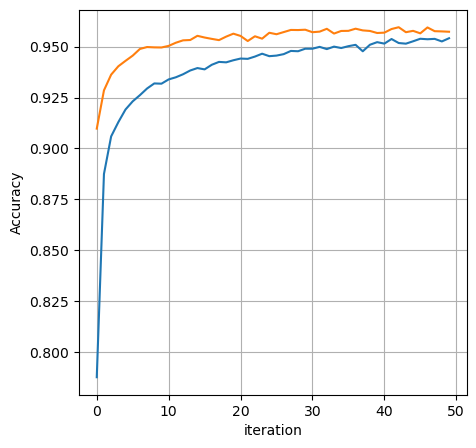

In [51]:
#// BEGIN_TODO [5XSL0_Assignment2_3_1] MNIST classifier

X, y = ex23_load_MNIST()

# Split datasets
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# compute the number of labels
num_labels = len(np.unique(y_train))


# One-Hot Encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

image_size = X_train.shape[1]
input_size = image_size * image_size

# resize and normalize
x_train = np.reshape(X_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(X_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

batch_size = 64
hidden_units = 25
dropout = 0.1

inputs1 = layers.Input(shape=input_size)
hidden1 = layers.Dense(hidden_units, use_bias=True)(inputs1)
activation1 = keras.activations.relu(hidden1, alpha=0.3)
dropout1 = layers.Dropout(dropout)(activation1)
hidden2 = layers.Dense(hidden_units, use_bias=True)(dropout1)
activation2 = keras.activations.relu(hidden2, alpha=0.3)
dropout2 = layers.Dropout(dropout)(activation2)
hidden3 = layers.Dense(hidden_units, use_bias=True)(dropout2)
activation3 = keras.activations.relu(hidden3, alpha=0.3)
dropout3 = layers.Dropout(dropout)(activation3)
outputs = layers.Dense(num_labels)(dropout3)
activation4 = keras.activations.softmax(outputs)

model10 = keras.Model(inputs1, activation4)
model10.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=[keras.metrics.categorical_accuracy])

history10 = model10.fit(x_train, y_train, epochs=50, batch_size=batch_size, validation_data=(x_test, y_test))

_, ax = plt.subplots(figsize=(5,5))
ax.plot(history10.history['categorical_accuracy'])
ax.plot(history10.history['val_categorical_accuracy'])
ax.grid(), ax.set_xlabel("iteration"), ax.set_ylabel("Accuracy")

In [52]:
model10.summary()

Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_184 (Dense)           (None, 25)                19625     
                                                                 
 tf.nn.leaky_relu_138 (TFOpL  (None, 25)               0         
 ambda)                                                          
                                                                 
 dropout_138 (Dropout)       (None, 25)                0         
                                                                 
 dense_185 (Dense)           (None, 25)                650       
                                                                 
 tf.nn.leaky_relu_139 (TFOpL  (None, 25)               0         
 ambda)                                                   

In [23]:
#// END_TODO [5XSL0_Assignment2_3_1]

### End of exercise 3.1
---
---
>   Make sure to restart this notebook and to rerun all cells before submission to check whether all code runs properly.